In [1]:
 # Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-processing and setup functions
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

# Neural Network
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Set viewable columns in pandas
pd.set_option('display.max_columns', 50)

In [2]:
main = pd.read_csv('main_test.csv')

In [3]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 33 columns):
Unnamed: 0         647 non-null int64
height             647 non-null float64
weight             647 non-null float64
games_played_14    647 non-null float64
goals_14           647 non-null float64
assists_14         647 non-null float64
penalty_min_14     647 non-null float64
plus_minus_14      647 non-null float64
games_played_15    647 non-null float64
goals_15           647 non-null float64
assists_15         647 non-null float64
penalty_min_15     647 non-null float64
plus_minus_15      647 non-null float64
games_played_16    647 non-null float64
goals_16           647 non-null float64
assists_16         647 non-null float64
penalty_min_16     647 non-null float64
plus_minus_16      647 non-null float64
games_played_17    647 non-null float64
goals_17           647 non-null float64
assists_17         647 non-null float64
penalty_min_17     647 non-null float64
plus_minus_17    

In [4]:
main = main.drop('Unnamed: 0', 1)

In [5]:
y = main['response']
X = main.drop(['response'], 1)

In [6]:
X = pd.get_dummies(X)

In [7]:
# Split X and y subsets into Test and Train datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [8]:
# Scale continuous values between 0 < x < 1
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

C:\Users\TPCal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
# Transform the y subsets into model usable representations
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [10]:
X_train_scaled.shape

(485, 45)

In [11]:
model = Sequential()

model.add(Dense(
    units = 100, kernel_regularizer = keras.regularizers.l2(0.001),
    activation = 'relu', 
    input_dim = 45
))

for i in range(5):
    model.add(Dense(
        units = 1000, kernel_regularizer = keras.regularizers.l2(0.001),
        activation = 'relu'
    ))

model.add(Dense(
    units = 3, 
    activation = 'softmax'
))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4600      
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              101000    
_________________________________________________________________
dense_2 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_3 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 3003      
Total para

In [13]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(
    X_train_scaled, 
    y_train_categorical, 
    epochs = 70,
    shuffle = True, 
    verbose = 1
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/70
485/485 [==============================] - 2s 3ms/sample - loss: 4.1295 - acc: 0.5835
Epoch 2/70
485/485 [==============================] - 1s 2ms/sample - loss: 2.4655 - acc: 0.6557
Epoch 3/70
485/485 [==============================] - 1s 2ms/sample - loss: 1.6872 - acc: 0.6680
Epoch 4/70
485/485 [==============================] - 1s 2ms/sample - loss: 1.3447 - acc: 0.6536
Epoch 5/70
485/485 [==============================] - 1s 2ms/sample - loss: 1.1647 - acc: 0.6990
Epoch 6/70
485/485 [==============================] - 1s 2ms/sample - loss: 1.0584 - acc: 0.7052
Epoch 7/70
485/485 [==============================] - 1s 2ms/sample - loss: 0.9952 - acc: 0.7113
Epoch 8/70
485/485 [==============================] - 1s 2ms/sample - loss: 0.9596 - acc: 0.7010
Epoch 9/70
485/485 [==============================] - 1s 2ms/sample - loss: 0.8817 - acc: 0.7155
Epoch 10/70
485/485 [==============================] - 1s 2ms/sample - loss: 0.

In [14]:
model_loss, model_accuracy = model.evaluate(X_test_scaled, y_test_categorical, verbose=0)
print(f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 1.6844312143914493, Accuracy: 0.6172839403152466


In [15]:
encoded_predictions = model.predict_classes(X_test_scaled)
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [16]:
print(classification_report(list(y_test), prediction_labels))

              precision    recall  f1-score   support

       Lower       0.47      0.53      0.49        40
         NHL       0.30      0.22      0.26        27
  Not Active       0.75      0.77      0.76        95

   micro avg       0.62      0.62      0.62       162
   macro avg       0.51      0.51      0.50       162
weighted avg       0.61      0.62      0.61       162



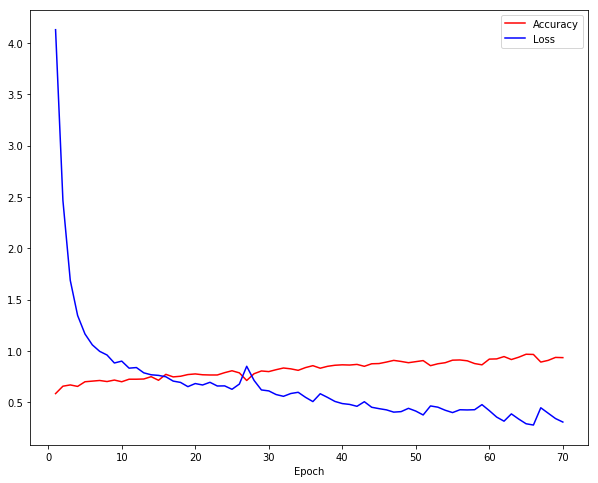

In [17]:
accuracy = model.history.history['acc']
loss = model.history.history['loss']
epoch_count = range(1, len(accuracy) + 1)

fig = plt.subplots(1, figsize=[10, 8])

plt.plot(epoch_count, accuracy, 'r-')
plt.plot(epoch_count, loss, 'b-')
plt.legend(['Accuracy', 'Loss'])
plt.xlabel('Epoch')
plt.show()

In [18]:
#model.save('Deep_NN_model.h5')